In [2]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder

In [4]:
# connect to database
DB_URI = os.environ.get('DB_URI')

con = create_engine(DB_URI)

In [5]:
# load dataframe
df = pd.read_sql_table('mobile_phones', con)

mobile_phones_df = df

In [6]:
# Fill missing numerical values with the mean
numerical_cols = ['price', 'old_price', 'discount', 'votes', 'stars']
mobile_phones_df[numerical_cols] = mobile_phones_df[numerical_cols].fillna(mobile_phones_df[numerical_cols].mean())

# Fill missing categorical values with the most frequent category
categorical_cols = ['brand', 'specs', 'image_url', 'official_store']
mobile_phones_df[categorical_cols] = mobile_phones_df[categorical_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))


In [7]:
# Convert categorical variables into numerical representations
# One-hot encode 'brand'
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
brand_encoded = onehot_encoder.fit_transform(mobile_phones_df[['brand']])
brand_df = pd.DataFrame(brand_encoded, columns=onehot_encoder.get_feature_names_out(['brand']))
mobile_phones_df = pd.concat([mobile_phones_df, brand_df], axis=1)

# Label encode 'official_store'
label_encoder = LabelEncoder()
mobile_phones_df['official_store_encoded'] = label_encoder.fit_transform(mobile_phones_df['official_store'])


/home/nyang/miniconda3/envs/exp-tracking-env/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [8]:
# Scale numerical features to bring them to a similar range. Used min-max scaling to scale the features between 0 and 1
scaler = MinMaxScaler()
numerical_cols_to_scale = ['price', 'old_price', 'discount', 'votes', 'stars']
mobile_phones_df[numerical_cols_to_scale] = scaler.fit_transform(mobile_phones_df[numerical_cols_to_scale])


In [9]:
# Define the target variable
y = mobile_phones_df['official_store_encoded']

# Define the feature matrix
features = ['price', 'discount', 'votes', 'stars'] + list(brand_df.columns)
X = mobile_phones_df[features]

# Convert all column names of X to strings
X = X.rename(columns={col: str(col) for col in X.columns})

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [11]:
mean_squared_error(y_test, y_pred, squared=False)

0.2066726102781788

In [12]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report to get more detailed evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

pd.set_option('display.max_columns', None)
# print(mobile_phones_df)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       374
           1       1.00      0.29      0.45        24

    accuracy                           0.96       398
   macro avg       0.98      0.65      0.71       398
weighted avg       0.96      0.96      0.95       398



/tmp/ipykernel_101473/1672306066.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_101473/1672306066.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


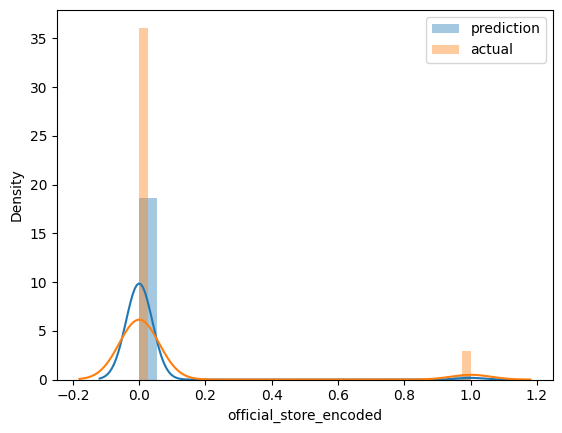

In [13]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [17]:
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(mobile_phones_df)

              crawled_at                                           item_url  \
0    2023-06-22 02:49:55  /samsung-galaxy-a04-6.5-64gb-4gb-ram-dual-sim-...   
1    2023-06-22 02:49:55  /samsung-galaxy-a14-4g-6.6-128gb-4gb-ram-dual-...   
2    2023-06-22 02:49:55  /samsung-galaxy-a04s-6.5-64-gb-4-gb-ram-dual-s...   
3    2023-06-22 02:49:55  /samsung-galaxy-a04e-6.5-32gb-3gb-ram-dual-sim...   
4    2023-06-22 02:49:55  /xiaomi-redmi-12c-6.71-3gb64gb-50mp-5000mah-4g...   
5    2023-06-22 02:49:55  /xiaomi-redmi-a1-6.52-2gb32gb-8.0mp-5000mah-4g...   
6    2023-06-22 02:49:56  /infinix-smart-7-hd-6.6-2gb-ram-64gb-5000mah-4...   
7    2023-06-22 02:49:56  /freeyond-f92gb64gb6.52-13.0mp4g-smartphone-50...   
8    2023-06-22 02:49:56  /xiaomi-redmi-a1-6.52-2gb32gb-8.0mp-5000mah-4g...   
9    2023-06-22 02:49:56  /infinix-smart-7-plus-6.6-4gb-ram-64gb-6000mah...   
10   2023-06-22 02:49:56  /infinix-hot-30i-6.56-4gb-ram-128gb-5000mah-du...   
11   2023-06-22 02:49:56  /tecno-camon-20-6.67-256gb